In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
%matplotlib inline
plt.style.use("fivethirtyeight")

In [2]:
data = load_digits()
X, y = data.data, data.target

In [3]:
for class_name, class_count in zip(data.target_names, np.bincount(data.target)):
    print class_name, class_count

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [4]:
y_binary_imbalance = y.copy()
y_binary_imbalance[y_binary_imbalance != 1] = 0

print "Original labels: ", y[1:30]
print "New labels: ", y_binary_imbalance[1:30]

Original labels:  [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New labels:  [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [5]:
np.bincount(y_binary_imbalance)

array([1615,  182], dtype=int64)

In [6]:
from sklearn.svm import SVC

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y_binary_imbalance, random_state=0)
svm = SVC(kernel="rbf", C = 1).fit(xtrain, ytrain)
print svm.score(xtest, ytest)

0.908888888889


In [8]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = "most_frequent").fit(xtrain, ytrain)
dummy_preds = dummy_majority.predict(xtest)

In [9]:
print dummy_majority.score(xtest, ytest)

0.904444444444


In [10]:
svm = SVC(kernel="linear", C = 1).fit(xtrain, ytrain)
print svm.score(xtest, ytest)

0.977777777778


In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
dummy_majority = DummyClassifier(strategy="most_frequent").fit(xtrain, ytrain)
y_majority_pred = dummy_majority.predict(xtest)
confusion = confusion_matrix(ytest, y_majority_pred)
print "Dummy class confusion class: \n", confusion

Dummy class confusion class: 
[[407   0]
 [ 43   0]]


In [13]:
svm_pred = svm.predict(xtest)
svm_confuse = confusion_matrix(ytest, svm_pred)
print "Linear SVC confusion matrix: \n", svm_confuse

Linear SVC confusion matrix: 
[[402   5]
 [  5  38]]


In [14]:
dummy_classprop = DummyClassifier(strategy="stratified").fit(xtrain, ytrain)
y_strat_pred = dummy_classprop.predict(xtest)
strat_confuse = confusion_matrix(ytest, y_strat_pred)
print "Stratified class prediction confusion matrix: \n", strat_confuse

Stratified class prediction confusion matrix: 
[[367  40]
 [ 37   6]]


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [16]:
#Accuracy = (TP + TN) / (TP + TN + FP + FN)
#Precision = TP/(TP + FP)
#Recall = TP / (TP + FN), also called sensitivity
#F1 = 2 * Precision * Recall / (Precision + Recall)

In [17]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression().fit(xtrain, ytrain)
logPreds = log.predict(xtest)
logConfuse = confusion_matrix(ytest, logPreds)
print "Logistic regression confusion matrix: \n", logConfuse

Logistic regression confusion matrix: 
[[401   6]
 [  6  37]]


In [18]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 2).fit(xtrain, ytrain)
treePreds = tree.predict(xtest)
treeConfuse = confusion_matrix(ytest, treePreds)
print "Decision tree confusion matrix: \n", treeConfuse

Decision tree confusion matrix: 
[[400   7]
 [ 17  26]]


In [19]:
print 'Accuracy: {:.2f}'.format(accuracy_score(ytest, treePreds))
print 'Precision: {:.2f}'.format(precision_score(ytest, treePreds))
print 'Recall: {:.2f}'.format(recall_score(ytest, treePreds))
print 'F1 score: {:.2f}'.format(f1_score(ytest, treePreds))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1 score: 0.68


In [20]:
from sklearn.metrics import classification_report

In [21]:
print classification_report(ytest, treePreds, target_names=["not 1", "1"])

             precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



In [22]:
y_scores_lr = log.fit(xtrain, ytrain).decision_function(xtest)
y_score_list = list(zip(ytest[:20], y_scores_lr[0:20]))
print y_score_list

[(0, -23.176968708056926), (0, -13.541369730889837), (0, -21.722744479080674), (0, -18.907382154600498), (0, -19.735782482277287), (0, -9.7497062466359665), (1, 5.2350051952261571), (0, -19.307487561985802), (0, -25.101086936386103), (0, -21.82730033991561), (0, -24.151134852996385), (0, -19.57688751366944), (0, -22.574657333754267), (0, -10.823308218720216), (0, -11.912085071104867), (0, -10.979187636253842), (1, 11.205964283641419), (0, -27.645926953447926), (0, -12.859411586795881), (0, -25.84868793759199)]


In [23]:
y_prob_lr = log.fit(xtrain, ytrain).predict_proba(xtest)
y_prob_list = list(zip(ytest[:20], y_prob_lr[:20, 1]))
print y_prob_list

[(0, 8.5974643330642508e-11), (0, 1.3153983028590654e-06), (0, 3.6807128788234909e-10), (0, 6.1465052987410425e-09), (0, 2.6844700978006756e-09), (0, 5.8308390433197469e-05), (1, 0.99470142760867652), (0, 4.119691454369493e-09), (0, 1.2552679886185212e-11), (0, 3.3153081967996498e-10), (0, 3.2456030411142168e-11), (0, 3.1467756333433573e-09), (0, 1.5701852342967064e-10), (0, 1.9929128593595975e-05), (0, 6.7087911484915541e-06), (0, 1.7052654297925158e-05), (1, 0.99998640730275112), (0, 9.8520470455343577e-13), (0, 2.6015212488670242e-06), (0, 5.9437079838929921e-12)]


In [24]:
from sklearn.metrics import roc_curve, auc

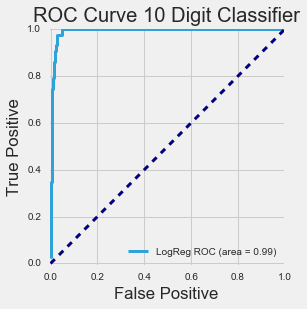

In [31]:
fpr_lr, tpr_lr, _ = roc_curve(ytest, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure();
plt.xlim([-0.01, 1.0]);
plt.ylim([-0.01, 1.01]);
plt.plot(fpr_lr, tpr_lr, lw=3, label="LogReg ROC (area = {:0.2f})".format(roc_auc_lr));
plt.xlabel("False Positive");
plt.ylabel("True Positive");
plt.title("ROC Curve 10 Digit Classifier");
plt.plot([0, 1], [0, 1], color="navy", lw=3, linestyle="--");
plt.axes().set_aspect("equal");
plt.legend(loc="lower right");

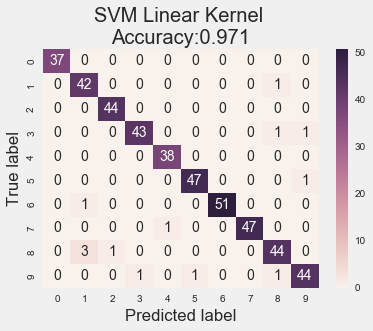

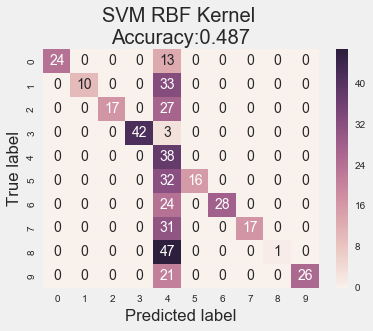

In [32]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [33]:
print classification_report(y_test_mc, svm_predicted_mc)

             precision    recall  f1-score   support

          0       1.00      0.65      0.79        37
          1       1.00      0.23      0.38        43
          2       1.00      0.39      0.56        44
          3       1.00      0.93      0.97        45
          4       0.14      1.00      0.25        38
          5       1.00      0.33      0.50        48
          6       1.00      0.54      0.70        52
          7       1.00      0.35      0.52        48
          8       1.00      0.02      0.04        48
          9       1.00      0.55      0.71        47

avg / total       0.93      0.49      0.54       450



In [34]:
print('Micro-averaged precision = {:.4f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.4f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.4867 (treat instances equally)
Macro-averaged precision = 0.9141 (treat classes equally)


In [35]:
print('Micro-averaged f1 = {:.4f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.4f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.4867 (treat instances equally)
Macro-averaged f1 = 0.5411 (treat classes equally)


In [38]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

('Linear model, coefficients: ', array([-698.80206267]))
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


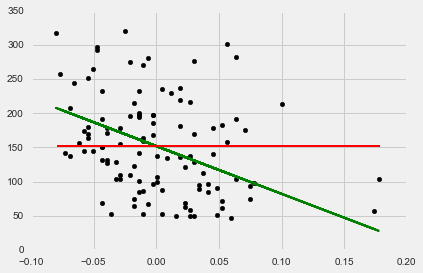

In [43]:
diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

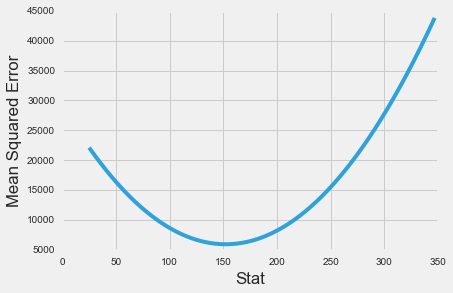

In [53]:
stat = np.arange(25, 347, 0.25)
MSEs = [mean_squared_error(y, [s]*len(y)) for s in stat]
plt.plot(stat, MSEs);
plt.xlabel("Stat");
plt.ylabel("Mean Squared Error");

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.scorer import SCORERS
from sklearn.metrics import roc_auc_score

In [55]:
data = load_digits()
X, y = data.data, data.target == 1
clf = SVC(kernel="linear", C = 1)

In [56]:
print "Cross-validation (accuracy)", cross_val_score(clf, X, y, cv = 5)

Cross-validation (accuracy) [ 0.91944444  0.98611111  0.97214485  0.97493036  0.96935933]


In [57]:
print "Cross-validation (AUC)", cross_val_score(clf, X, y, cv =5, scoring="roc_auc")

Cross-validation (AUC) [ 0.9641871   0.9976571   0.99372205  0.99699002  0.98675611]


In [58]:
print "Cross-validation (recall)", cross_val_score(clf, X, y, cv =5, scoring="recall")

Cross-validation (recall) [ 0.81081081  0.89189189  0.83333333  0.83333333  0.83333333]


In [60]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)
clf = SVC(kernel="rbf")
grid_values = {"gamma": [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}
grid_clf_acc = GridSearchCV(clf, param_grid=grid_values)
grid_clf_acc.fit(xtrain, ytrain)
y_decision_acc = grid_clf_acc.decision_function(xtest)
print "Grid best parameter (max accuracy): ", grid_clf_acc.best_params_
print "Grid best score (accuracy): ", grid_clf_acc.best_score_

Grid best parameter (max accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.996288047513


In [63]:
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(xtrain, ytrain)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(xtest) 

print('Test set AUC: ', roc_auc_score(ytest, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

('Test set AUC: ', 0.99982858122393004)
('Grid best parameter (max. AUC): ', {'gamma': 0.001})
('Grid best score (AUC): ', 0.99987412783021423)


In [64]:
print sorted(list(SCORERS.keys()))

['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']
